# Data Analysis I

#### Loading Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys, os

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 70)

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *
from visualizer import *

#### Loading Data

In [3]:
df_ms = pd.read_csv(r"../data/msv7.csv")
df_hs = pd.read_csv(r"../data/hsv7.csv")
df_hs.head()

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,time_with_parents,communication_with_parents,reward_for_achievements,parent_understanding,transport_type,residence,travel time,birth_order,exercice,previous_school,mother_tongue,curriculum,sleeping time_in_pm,parenting_style,trauma,type,quality,literature,eng,maths,physics,chemistry,biology,geography,history,civics,amharic,ict,ent-ship,hpe,gpa,matrik
0,abem kibru worku,b,15,m,ethiopian,ethiopia,no,9,paid,both,little,agree,agree,somehow agree,public,zenebework,30-60,middle child,2.0,passion,eth-lang,no,7.0,authoritative,0.0,phy,3.25,76.75,93.67,70.56,72.76,44.70,66.37,73.02,72.19,87.43,96.58,71.31,76.26,64.90,74.3,72.6
1,amanuel demeke hailu,a,14,m,ethiopian,ethiopia,no,9,paid,both,little,agree,strongly agree,somehow agree,private,zenebework,15-,middle child,3.0,gibson,eth-lang,no,7.5,authoritative,0.0,none,3.50,77.52,94.33,62.57,70.85,77.20,69.77,74.17,81.65,76.48,84.84,80.42,77.16,86.00,77.9,75.9
2,ananya girma tegegn,a,14,m,ethiopian,ethiopia,no,9,scholarship,both,a lot,strongly agree,strongly agree,strongly agree,public,cmc,30-60,first child,3.0,dr bekele,eth-lang,no,7.5,authoritative,0.0,none,4.50,88.27,91.67,97.16,85.77,97.90,96.27,95.33,83.40,93.05,97.18,94.27,88.76,89.50,92.2,92.6
3,blen amare mesfin,a,15,f,ethiopian,ethiopia,no,9,paid,both,a lot,strongly agree,strongly agree,strongly agree,service,megenagna,30-60,last child,3.0,magic carpet,eth-lang,no,8.0,permissive,1.0,none,4.50,73.81,91.00,72.55,67.95,76.70,79.35,78.50,75.03,83.81,96.15,88.55,83.16,84.00,80.8,78.1
4,dagmawi misganaw bimerew,a,14,m,ethiopian,ethiopia,yes,9,paid,both,a lot,agree,agree,agree,private,bole bulbula,30-60,middle child,0.0,school of nations,eth-lang,no,8.5,authoritative,0.0,none,3.75,91.77,97.67,90.60,76.69,71.97,84.72,85.04,84.30,88.48,94.10,92.66,85.66,93.25,87.5,84.9


In [4]:
df_ms.columns

Index(['name', 'conduct', 'age', 'gender', 'nationality', 'pob',
       'tutor/makeup', 'grade', 'admission', 'guardian', 'time_with_parents',
       'communication_with_parents', 'reward_for_achievements',
       'parent_understanding', 'transport_type', 'residence', 'travel time',
       'birth_order', 'exercice', 'previous_school', 'mother_tongue',
       'curriculum', 'sleeping time_in_pm', 'parenting_style', 'trauma',
       'type', 'quality', 'english', 'amharic', 'arabic', 'geez', 'ict',
       'maths', 'ss', 'gp', 'is', 'moral', 'hpe', 'art', 'chemistry',
       'physics', 'gpa'],
      dtype='object')

In [5]:
df_hs.rename(columns = {'eng':'english'}, inplace = True)

In [6]:
df_hs.birth_order = df_hs['birth_order'].replace('only child', 'first child')
df_hs.birth_order.value_counts()

first child     80
middle child    47
last child      45
Name: birth_order, dtype: int64

In [7]:
ms_filter = df_ms[['name','conduct','quality', 'age', 'gender', 'grade', 'admission', 'birth_order', 'gpa', 'maths', 'physics', 'chemistry','amharic', 'geez', 'arabic', 'english', 'ict', 'ss', 'gp','is','hpe', 'moral']]

In [8]:
hs_filter = df_hs[['name', 'conduct', 'quality','age', 'gender', 'grade', 'admission', 'birth_order', 'gpa', 'maths', 'physics' , 'chemistry', 'biology', 'english', 'literature', 'amharic', 'hpe', 'ict', 'geography', 'history', 'ent-ship']]

#### Concatenating Data

In [9]:
frames = [ms_filter, hs_filter]
df = pd.concat(frames)


In [10]:
df.head()

,name,conduct,quality,age,gender,grade,admission,birth_order,gpa,maths,physics,chemistry,amharic,geez,arabic,english,ict,ss,gp,is,hpe,moral,biology,literature,geography,history,ent-ship
0,abem ashenafi assefa,a,4.25,10.0,f,5,paid,middle child,89.4,76.38,NaN,NaN,94.58,84.41,88.45,94.86,88.52,85.93,95.00,82.01,95.48,98.28,NaN,NaN,NaN,NaN,NaN
1,abiya zerihun alemu,b,4.00,12.0,m,5,scholarship,first child,81.9,74.92,NaN,NaN,77.39,80.98,81.86,74.12,76.90,70.32,94.75,74.16,96.15,89.84,NaN,NaN,NaN,NaN,NaN
2,aman dilu shaleka,a,4.25,10.0,m,5,paid,last child,87.9,84.33,NaN,NaN,86.58,74.69,95.04,80.12,95.52,81.42,93.75,85.45,94.39,91.61,NaN,NaN,NaN,NaN,NaN
3,barok bahiru hunde,c,4.50,11.0,m,5,paid,last child,85.9,90.63,NaN,NaN,91.68,86.70,89.64,82.67,87.81,81.14,82.50,80.86,93.89,81.91,NaN,NaN,NaN,NaN,NaN
4,bethany yilkal,b,4.00,11.0,f,5,paid,middle child,95.5,96.00,NaN,NaN,96.99,92.09,97.60,96.31,98.62,89.07,99.75,94.73,88.69,98.77,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(287, 27)

In [12]:
df.admission.value_counts()

paid           195
scholarship     92
Name: admission, dtype: int64

In [13]:
df.gender.value_counts()

f    150
m    137
Name: gender, dtype: int64

In [14]:
df.grade.value_counts()

9     57
10    44
12    40
7     37
11    31
8     30
6     26
5     22
Name: grade, dtype: int64

In [15]:
df.columns

Index(['name', 'conduct', 'quality', 'age', 'gender', 'grade', 'admission',
       'birth_order', 'gpa', 'maths', 'physics', 'chemistry', 'amharic',
       'geez', 'arabic', 'english', 'ict', 'ss', 'gp', 'is', 'hpe', 'moral',
       'biology', 'literature', 'geography', 'history', 'ent-ship'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 171
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         287 non-null    object 
 1   conduct      287 non-null    object 
 2   quality      287 non-null    float64
 3   age          287 non-null    float64
 4   gender       287 non-null    object 
 5   grade        287 non-null    int64  
 6   admission    287 non-null    object 
 7   birth_order  287 non-null    object 
 8   gpa          287 non-null    float64
 9   maths        287 non-null    float64
 10  physics      205 non-null    float64
 11  chemistry    205 non-null    float64
 12  amharic      287 non-null    float64
 13  geez         115 non-null    float64
 14  arabic       115 non-null    float64
 15  english      287 non-null    float64
 16  ict          287 non-null    float64
 17  ss           115 non-null    float64
 18  gp           115 non-null    float64
 19  is      

In [17]:
df.birth_order.value_counts()

first child     132
middle child     86
last child       69
Name: birth_order, dtype: int64

(0.0, 100.0)

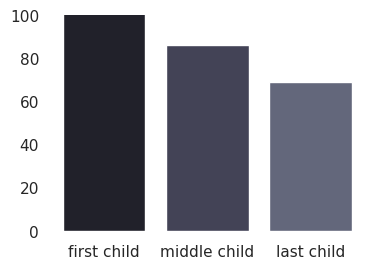

In [18]:
sns.set(rc={'figure.figsize':(4.0,2.8)})
sns.set_palette("bone")
sns.set_style("white")
ax = sns.countplot(data = df, x='birth_order', order=df['birth_order'].value_counts().index)
sns.despine(top=True, left=True, bottom=True)
plt.ylabel("", size=10)
plt.xlabel("", size=10)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set_ylim(bottom=0, top=100)


#### Does birth order affect Performance?

    Are first born the smartest?
    Are the middle ones trouble makers?
    Are last born underachievers?

Text(0.5, -11.750000000000004, '')

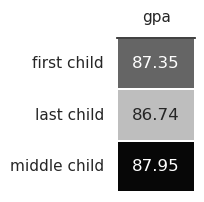

In [19]:
bg = df.groupby('birth_order')[['gpa']].mean()
plt.figure(figsize=(1, 2))
sns.heatmap(bg, annot=True, cmap='Greys', vmin=86, vmax=88, fmt='.2f', linewidths=.3, cbar = False)
sns.despine(top=False, left=True, bottom=True) 
sns.set_style("white")
plt.ylabel("") 
plt.xlabel("") 

In [20]:
#d = {'gpa':'GPA', 'quality':'family','convalue':'conduct'}
#df.groupby('birth_order').agg({'gpa':'mean', 'quality':'mean','convalue':'mean'}).rename(columns=d)

#### Data Analysis on Birth order relation with Grades

     Mathematics and Science subjects performances relationship with birth order.

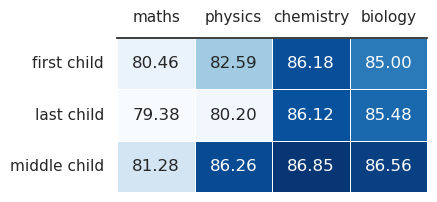

In [21]:
# mean marks and project submissions for each student
mainx = df.groupby('birth_order')[['maths', 'physics', 'chemistry','biology']].mean()
legit_heat(mainx, 80, 87, 4, 'Blues')  

     Langucheckerx subjects performances relationship with birth order.

In [22]:
df.groupby('birth_order')[['english', 'amharic']].mean()

,english,amharic
birth_order,,
first child,89.742756,89.800933
last child,88.185362,86.473478
middle child,89.573605,89.256977


    Social subjects and physical Education performances relationship with birth order. 

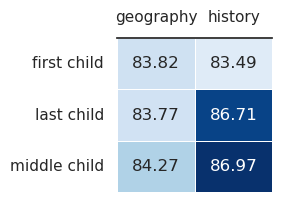

In [23]:
ghh = df.groupby('birth_order')[['geography', 'history']].mean()
legit_heat(ghh, 83, 87, 2, 'Blues')  

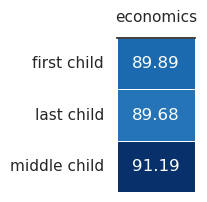

In [24]:
df = df.rename(columns={"ent-ship": "economics"})
ghh = df.groupby('birth_order')[['economics']].mean()
legit_heat(ghh, 86, 91, 1,'Blues') 

#### Bivariate Anlaysis

    GPA vs Birth Order

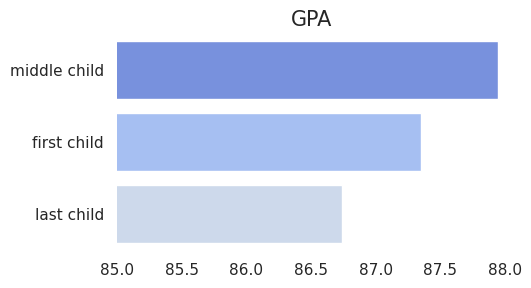

In [25]:
legitbar(df, 'gpa', 'birth_order', 'GPA', 85, 88)

    Mathematics vs Birth Order

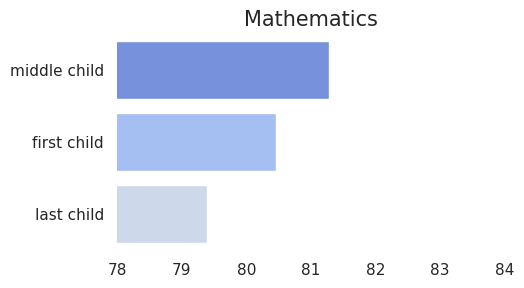

In [26]:
legitbar(df, 'maths', 'birth_order', 'Mathematics', 78, 84)

     Chemistry vs Birth Order

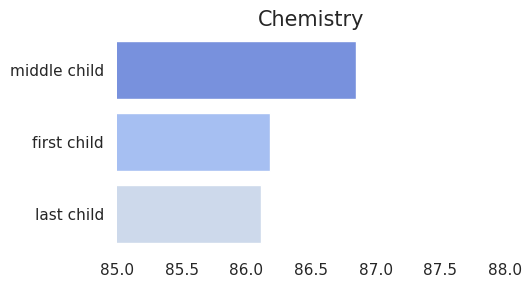

In [27]:
legitbar(df, 'chemistry', 'birth_order', 'Chemistry', 85, 88)



     Physics vs Birth Order

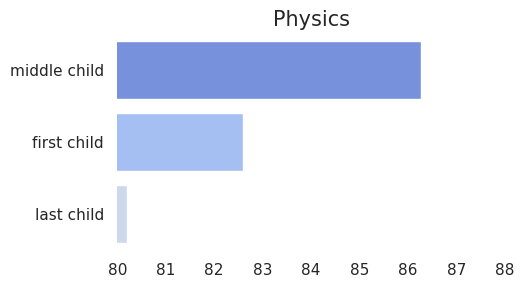

In [28]:
legitbar(df, 'physics', 'birth_order', 'Physics', 80, 88)

     Biology vs Birth Order

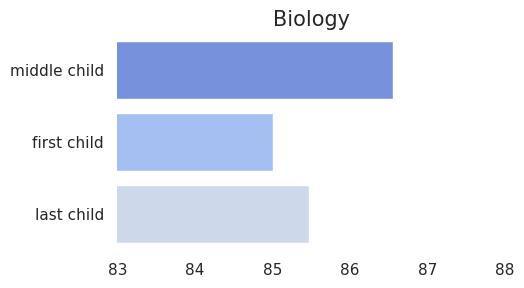

In [29]:
legitbar(df, 'biology', 'birth_order', 'Biology', 83, 88)

     HPE vs Birth Order

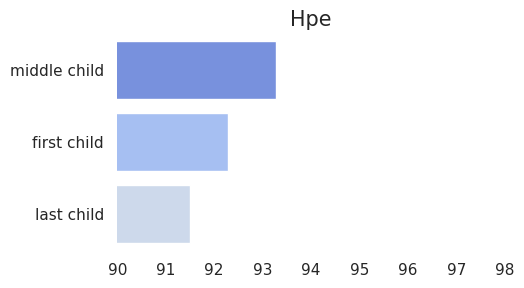

In [30]:
legitbar(df, 'hpe', 'birth_order', 'Hpe', 90, 98)

     Geography vs Birth Order

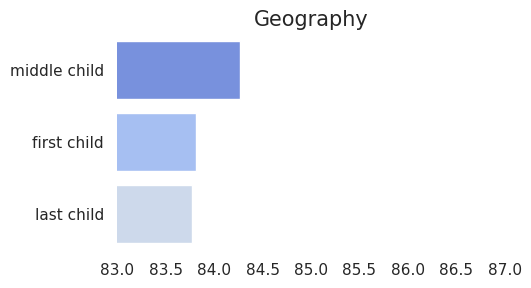

In [31]:
legitbar(df, 'geography', 'birth_order', 'Geography', 83, 87)

     History vs Birth Order

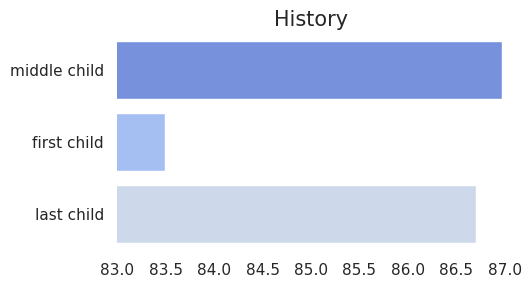

In [32]:
legitbar(df, 'history', 'birth_order', 'History', 83, 87)

#### Multivariate Analysis

      Admission type effects on the birth_order and performance relationship

In [33]:
df_paid = df[df.admission == 'paid']
df_scholar = df[df.admission == 'scholarship']

##### Paid

In [34]:
df_paid.groupby('birth_order')[['gpa']].mean() 


,gpa
birth_order,
first child,86.367033
last child,84.285714
middle child,86.535484


In [35]:
df_paid.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'biology']].mean()

,gpa,maths,physics,chemistry,biology
birth_order,,,,,
first child,86.367033,78.247003,81.002769,83.817385,82.919762
last child,84.285714,75.588571,76.650000,81.952273,80.090667
middle child,86.535484,78.646452,84.808286,84.794286,83.884762


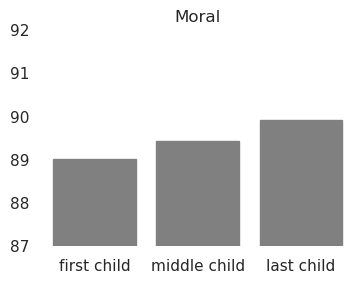

In [36]:
sns.set(rc={'figure.figsize':(4.0,2.8)})
sns.set_style("white")
sns.set_palette('Blues_r')
ax = sns.barplot(data = df_scholar,  x='birth_order', y = 'geography', order=df_paid['birth_order'].value_counts().index, ci=None)
sns.despine(top=True, left=True, bottom=True)
plt.ylabel("", size=10)
plt.xlabel("", size=10)
ax.set_title('Moral', size=12)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set_ylim(bottom=87, top=92)
for bar in ax.patches:
		if bar.get_height() > 90:
		    bar.set_color('#5C5CFF')
		else:
		    bar.set_color('grey')

##### Scholarship

In [37]:
df_scholar.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'biology']].mean()

,gpa,maths,physics,chemistry,biology
birth_order,,,,,
first child,89.546341,85.361707,85.382162,90.336216,88.247037
last child,90.562963,85.282222,83.590870,90.098261,89.730000
middle child,91.587500,88.069583,88.476087,89.972174,90.312667


     Gender effects on the birth_order and performance relationship

In [38]:
dfm = df[df.gender == 'm']
dff = df[df.gender == 'f']

     Male Students Birth Order and Major Grades

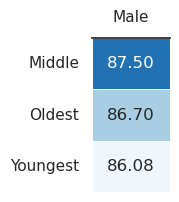

In [39]:
#dfm.groupby('birth_order')[['gpa']].mean()

dfm['birth_order'] = dfm['birth_order'].replace('first child', 'Oldest')
dfm['birth_order'] = dfm['birth_order'].replace('middle child', 'Middle')
dfm['birth_order'] = dfm['birth_order'].replace('last child', 'Youngest')
d = {'gpa':'Male'}
t = dfm.groupby('birth_order').agg({'gpa':'mean'}).rename(columns=d)
legit_heat(t, 86, 88, 1, 'Blues')  

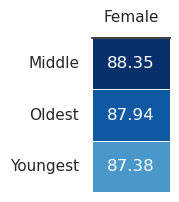

In [40]:
dff['birth_order'] = dff['birth_order'].replace('first child', 'Oldest')
dff['birth_order'] = dff['birth_order'].replace('middle child', 'Middle')
dff['birth_order'] = dff['birth_order'].replace('last child', 'Youngest')
d = {'gpa':'Female'}
t = dff.groupby('birth_order').agg({'gpa':'mean'}).rename(columns=d)
legit_heat(t, 86, 88.3, 1, 'Blues') 

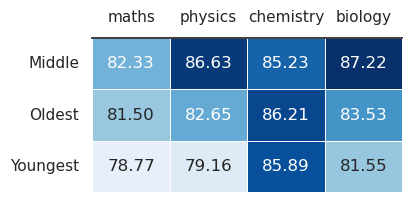

In [41]:
t = dfm.groupby('birth_order')[['maths', 'physics', 'chemistry', 'biology']].mean()
legit_heat(t, 78, 87, 4, 'Blues') 

     Female Students Birth Order and Major Grades

In [42]:
t = dff.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'biology']].mean()

     Male Students Birth Order and Social Subjects Grade


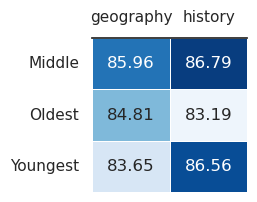

In [43]:
t = dfm.groupby('birth_order')[['geography', 'history']].mean()
legit_heat(t, 83, 87, 2, 'Blues')  

     Female Students Birth Order and Social Subjects Grade

In [44]:
dff.groupby('birth_order')[['geography', 'history']].mean()

,geography,history
birth_order,,
Middle,81.733125,87.252500
Oldest,82.722069,83.821724
Youngest,83.844000,86.804500


#### Feature Engineering for Conduct values 

In [45]:
def conval(x):
    if x == 'a':
        return 3
    elif x == 'b':
        return 2
    else:
        return 1 
    
df['convalue'] = df.conduct.apply(conval)

In [46]:
df.columns

Index(['name', 'conduct', 'quality', 'age', 'gender', 'grade', 'admission',
       'birth_order', 'gpa', 'maths', 'physics', 'chemistry', 'amharic',
       'geez', 'arabic', 'english', 'ict', 'ss', 'gp', 'is', 'hpe', 'moral',
       'biology', 'literature', 'geography', 'history', 'economics',
       'convalue'],
      dtype='object')

#### Conduct vs Birth order

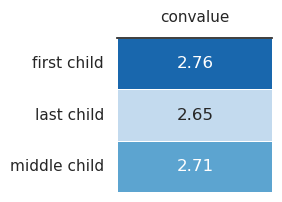

In [47]:
t = df.groupby('birth_order')[['convalue']].mean()
legit_heat(t, 2.6, 2.8, 2, 'Blues') 
 

#### Quality of family Relationship vs Birth order

In [48]:
df.groupby('birth_order')[['quality']].mean()


,quality
birth_order,
first child,3.803030
last child,3.739130
middle child,3.802326


## Advanced Analysis

#### Checking siblings from the same household

In [49]:
def checker(x):
    pname = ''
    last = x.split(" ")
    if len(last) == 3:
       pname = last[1] + last[2]
       return pname
    else:
       return x 
    
df['checkerx'] = df.name.apply(checker)       
        

In [50]:
s = df.checkerx.value_counts()
s = s.to_frame()
s[s.checkerx == 2]

,checkerx
aminfedlu,2
almawyeshiwas,2
abebedula,2
abduyimer,2
telaynehkefyalew,2
sisaymenji,2
nebiyouhaddis,2
henoktessema,2
bitwodedtezera,2
awelachewyirga,2


In [51]:
a = df[df.checkerx == 'almawyeshiwas'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [52]:
b = df[df.checkerx == 'abebedula'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [53]:
c = df[df.checkerx == 'abduyimer'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [54]:
df.checkerx.value_counts()
d = df[df.checkerx == 'telaynehkefyalew'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [55]:
df.checkerx.value_counts()
e = df[df.checkerx == 'sisaymenji'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [56]:
f = df[df.checkerx == 'zerihunewenetu'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [57]:
g = df[df.checkerx == 'abdulshikurmenu'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [58]:
df.checkerx.value_counts()
i = df[df.checkerx == 'awelachewyirga'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]


In [59]:
df.checkerx.value_counts()

bahiruhunde        4
meketebale         4
abrahamalemneh     3
mohammedsied       3
aminfedlu          2
                  ..
zelaleminyew       1
misganawgenanew    1
solomonabera       1
demekehailu        1
meseretmelaku      1
Name: checkerx, Length: 254, dtype: int64

In [60]:
j =df[df.checkerx == 'tekaligntadesse'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]


In [61]:
k = df[df.checkerx == 'dawitmekonen'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]


In [62]:
l = df[df.checkerx == 'kenmostesfaye'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]


In [63]:
m = df[df.checkerx == 'worknehdelelgn'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [64]:
n = df[df.checkerx == 'girmalegesse'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [65]:
o = df[df.checkerx == 'mekonentesfaye'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]


In [66]:
p = df[df.checkerx == 'henoktessema'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [67]:
q = df[df.checkerx == 'bitwodedtezera'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [68]:
r = df[df.checkerx == 'aminfedlu'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [69]:
s = df[df.checkerx == 'kibruworku'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [70]:
t = df[df.checkerx == 'andargachewbekele'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [71]:
u = df[df.checkerx == 'dilushaleka'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [72]:
v = df[df.checkerx == 'nebiyouhaddis'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [73]:
x = df[df.checkerx == 'jacobseth'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [74]:
w = df[df.checkerx == 'sisayyitbarek'][['name','birth_order', 'gpa', 'checkerx', 'conduct']]

In [75]:
frames2 = [a,b,c,e,g,j,k,l,n,o]
z = pd.concat(frames2)

#l,n,o,p,q,r,s
#l,n,o,p,q,r,s
#ZOLA
#6 3 14

In [76]:
'''
import matplotlib.ticker as mticker
ax = sns.catplot(
    data=z, kind="bar",aspect=2.0,
    y="checkerx", x="gpa", hue="birth_order",
     palette=['#456789','#FF5C5C']
)

sns.set_style("white")
sns.despine(top=True, left=True, bottom=True)
plt.xlim(0, 100)
plt.ylabel("", size=10)
plt.xlabel("", size=10)

group_labels = ['AY', 'AD',
             'AY', 'SM', 'AM', 'TT', 'DM', 'KT', 'GL', 'MT']

ax.set_yticklabels(group_labels)
'''   

'\nimport matplotlib.ticker as mticker\nax = sns.catplot(\n    data=z, kind="bar",aspect=2.0,\n    y="checkerx", x="gpa", hue="birth_order",\n     palette=[\'#456789\',\'#FF5C5C\']\n)\n\nsns.set_style("white")\nsns.despine(top=True, left=True, bottom=True)\nplt.xlim(0, 100)\nplt.ylabel("", size=10)\nplt.xlabel("", size=10)\n\ngroup_labels = [\'AY\', \'AD\',\n             \'AY\', \'SM\', \'AM\', \'TT\', \'DM\', \'KT\', \'GL\', \'MT\']\n\nax.set_yticklabels(group_labels)\n'

In [77]:
z.to_csv('samehouse.csv')

In [78]:
import plotly.express as px

In [79]:
fig = px.histogram(z, y="gpa", x="checkerx",
             color='birth_order', barmode='group',
             height=500)

fig.update_layout(plot_bgcolor="rgba(0,0,0,0)", bargap=0.6, yaxis_range=[70,100])

fig.show()